# Richie 'Rinehart' Club
Globalisation is the increasing interconnectedness and interdependence of countries worldwide [Google AI, 2025 Dec. 17]. We assert we''ll need all the collaboration we can get to disrupt the elite (predominantly white, priviledged, that own cocks). With that in mind, we present our central argument and 'call to arms', that the status-quo is completely broken and needs revolution. Bring forth Data Science, and hopefully the financially capital to catalyse this agenda. We are inspired by down-under 'social enterprises', viewing them as real leaders (that are willing to contribute). In other words they are missioned with real service, and hopefully will have real impact while delivering real value.

[Text(0, 0, ' 6'),
 Text(0, 0, ' 5'),
 Text(0, 0, ' 8'),
 Text(0, 0, ' 18'),
 Text(0, 0, ' 37'),
 Text(0, 0, ' 24'),
 Text(0, 0, ' 2')]

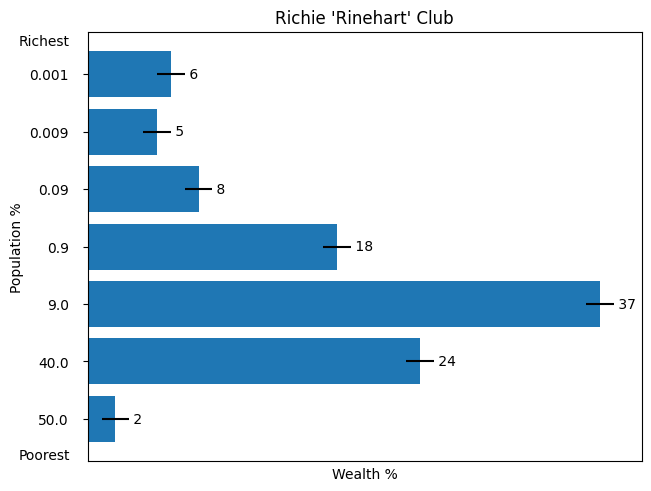

In [157]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import ticker

# make it look pretty, as CEO's don't know what else is more important
plt.rc('font', family='sans-serif')
#plt.style.use('./matplotlib_theme_rose-pine/themes/rose-pine-moon.mplstyle')

# reliable data source: https://wir2026.wid.world/insight/global-economic-inequity/
wealthSum = (6, 11, 19, 37, 74, 98, 100)
wealthPerPerson = (986000000, 173000000, 30000000, 6000000, 1000000, 91700, 6500)
percentiles = np.array([0.001, 0.01, 0.1, 1, 10, 50, 100])

# pre-process data
wealth = [6]
percent = [0.001]
for i in range(len(percentiles) - 1):
    percent.append(percentiles[i+1] - percentiles[i])
    wealth.append(wealthSum[i+1] - wealthSum[i])

def truncate(number, decimals=0):
    if decimals < 0:
        raise ValueError("Decimals cannot be negative")
    factor = 10.0**decimals
    return math.trunc(number * factor) / factor

percentTrunc = []
for i in range(len(percent)):
    t = truncate(percent[i], 3)
    percentTrunc.append(t)
percent = np.array(percentTrunc)

formattedWealth = {}
for i in range(len(wealth)):
    formattedWealth[str(percent[i])] = wealth[i]

# visualise (grok) data
fig, ax = plt.subplots(layout="constrained")
error = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
hbar = ax.barh(formattedWealth.keys(), formattedWealth.values(), xerr=error)
#line = ax.plot(formattedWealthPerPerson.keys(), formattedWealthPerPerson.values())
ax.set_xlabel('Wealth %')
ax.set_xlim(0, 40)
ax.set_ylabel('Population %')
ax.set_title("Richie 'Rinehart' Club")
ax.annotate('Richest', xy=(0, 1), xytext=(-5.0, -0.5))
ax.annotate('Poorest', xy=(0, 1), xytext=(-5.0, 6.70))
ax.invert_yaxis()                                        # richest to poorest
ax.tick_params("y", pad=10)                              # increase left-side padding
plt.grid(False)                                          # remove lines within plot
ax.xaxis.set_major_locator(ticker.NullLocator())         # remove x-axis numbers
ax.bar_label(hbar, fmt=' %.0f')                          # add numeric value within plot

The majority of the world's population is relatively poor compared to the richest 10% that own significantly more wealth. Within that more elite group, the most wealth is owned by the less rich. But these groupings are rather arbitrary, yet are perhaps sufficient for comparison across countries.

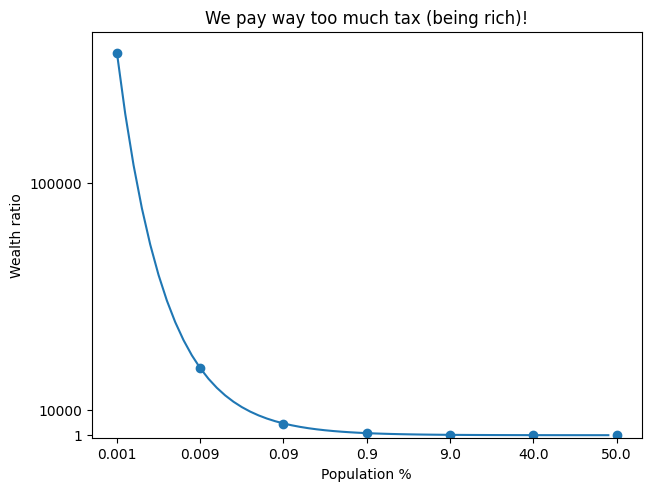

In [162]:
import numpy as np
from scipy.optimize import curve_fit

# Pre-process data
normWealthPerPerson = []
for i in range(len(wealth)):
    normValue = wealthPerPerson[i] / 6500
    normWealthPerPerson.append(normValue)

# Define the math. model 
def fit_func(x, a, b):
    return a ** (x - b)  # decreasing exponential function

# Fit the model to the data
x_data = [0, 1, 2, 3, 4, 5, 6]
paramOpt, paramCov = curve_fit(fit_func, x_data, normWealthPerPerson, bounds=(0, [0.25, 100]))

# Gauge model's accuracy (it 'converged', but perhaps only locally)
fig, ax = plt.subplots(layout="constrained")
x_data_hifi = np.arange(0, 6, 0.1)
ax.plot(x_data_hifi, fit_func(x_data_hifi, *paramOpt), label="model")
ax.scatter(x_data, normWealthPerPerson, label="real")
#ax.legend()

# Improve visualisation's impact
ax.set_title("We pay way too much tax (being rich)!")
ax.set_ylabel('Wealth ratio')
ax.set_xlabel('Population %')
ax.set_ylim(-1000, 160000)
ax.set_xticks(x_data, labels=percent)
ax.yaxis.set_major_locator(ticker.FixedLocator([1, 10000, 100000]))

Further data analysis reveals a very worrying trend across the population, the concentration of wealth in the hands of the richest massively increases the richer they are (following an exponential mathematical model). This, in combination with the significant amount of wealth in total that this subgroup has suggests they have the ability to exert significant influence on society (for example the richest person in the world can financially exert equivalent to ~ 150,000 of the poorest people). Seems a tad un-democratic to us.